In [1]:
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
CATS = ['rsivl', 'sav_obj_sce', 'ic9600_sce', 'sav_art', 'sav_sup', 'ic9600_paint', 'visc', 'sav_int']

In [3]:
data = pickle.load(open("/ptmp/tshen/shared/Results/results.p", "rb"))

# Symmetry vs Model Error

In [98]:
def plot_error_corr(dset, field, figsize=(8, 4), dpi=300, outpath=None):
    df = data[dset][['complexity', 'predictions', 'error', field]].copy()
    df = df[~df[field].isna()].reset_index()
    x, y = df[field], df['error']

    X = sm.add_constant(x)
    rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
    model = rlm_model.fit()
    fig = plt.figure(figsize=figsize)
    plt.scatter(x, y, color="#499F68")
    plt.plot(x, model.predict(), color="#1c1c1c")
    plt.text(0.75, 25, "y={:.1f}x+{:.1f}\np < ".format(model.params[1], model.params[0]) + r"$10^{-10}$")
    plt.xlabel("Symmetry")
    plt.ylabel("Error (Prediction - Ground truth)")
    print(model.pvalues)
    print(model.summary())
    if outpath is not None:
        fig.savefig(outpath, dpi=dpi, bbox_inches='tight', transparent=True)

const            5.248162e-11
visc_symmetry    5.389670e-11
dtype: float64
                    Robust linear Model Regression Results                    
Dep. Variable:                  error   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jan 2024                                         
Time:                        20:18:53                                         
No. Iterations:                    15                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

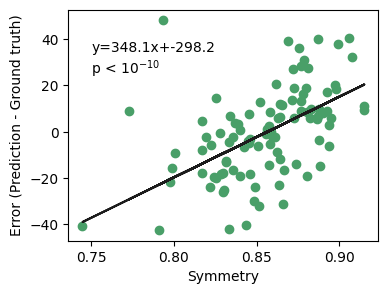

In [99]:
plot_error_corr("sav_int", "visc_symmetry", figsize=(4, 3), outpath="./symm_error.png")

                    Robust linear Model Regression Results                    
Dep. Variable:                  error   No. Observations:                  799
Model:                            RLM   Df Residuals:                      797
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jan 2024                                         
Time:                        16:26:07                                         
No. Iterations:                    12                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -121.0689      9.044    -13.387

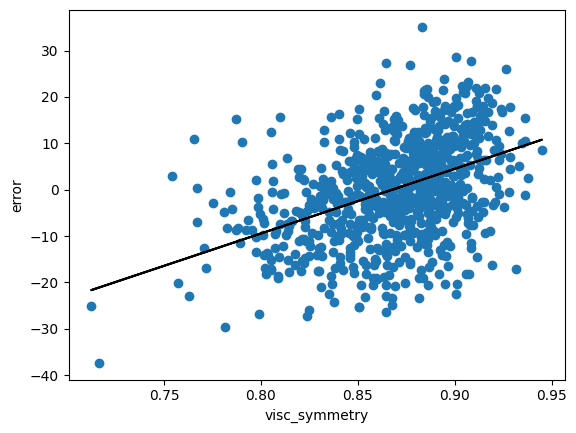

In [58]:
plot_error_corr("visc", "visc_symmetry")